In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
!pip install textblob
!pip install textsearch
!pip install contractions
!pip install afinn
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 887.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=b0948e17c5d9ce647fc4a4c11b1281808a6ce121fc1e9e6ea69730968d6438cf
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/apple-twitter-sentiment-texts.csv")

In [ ]:
# Text Normalization

In [ ]:
data.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [ ]:
for i in range(len(data.sentiment)):
    if data.sentiment[i] == -1:
        data["sentiment"][i] = "negative"
    elif data.sentiment[i] == 0:
        data["sentiment"][i] = "neutral"
    else:
        data["sentiment"][i] = "positive"

data.head()

<ipython-input-65-58c6782aa1be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sentiment"][i] = "negative"


,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,negative
1,What Happened To Apple Inc? http://t.co/FJEX...,neutral
2,Thank u @apple I can now compile all of the pi...,positive
3,The oddly uplifting story of the Apple co-foun...,neutral
4,@apple can i exchange my iphone for a differen...,neutral


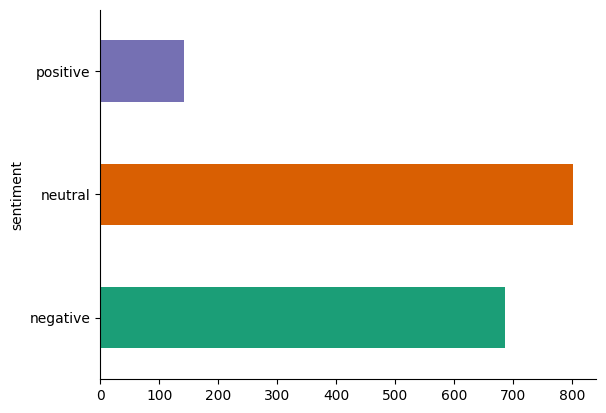

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

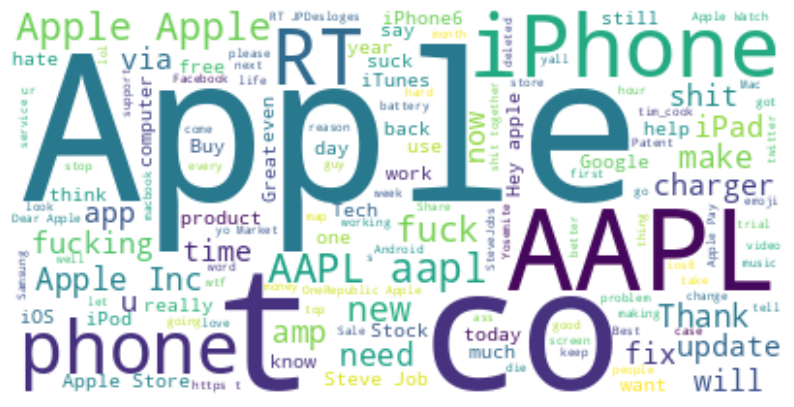

In [ ]:
# Generate a word cloud image
from wordcloud import WordCloud
text = " ".join(review for review in data.text)
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from bs4 import BeautifulSoup

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# tokenization of words
tokenizers = ToktokTokenizer()
# setting English stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
#removing the noisy text
def noiseremoval_text(text):
  soup = BeautifulSoup(text, "html.parser")
  text = soup.get_text()
  text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|#[a-zA-Z]+|$[a-zA-Z]+|@[a-zA-Z]+|[,.^_$*%-;鶯!?:]', '', text)
  return text

In [ ]:
data['text']=data['text'].apply(noiseremoval_text)

<ipython-input-71-851194ffa38d>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
data.head()

,text,sentiment
0,Wow Yall needa step it up RT Music and snapc...,negative
1,What Happened To Apple Inc,neutral
2,Thank u I can now compile all of the pics tha...,positive
3,The oddly uplifting story of the Apple cofound...,neutral
4,can i exchange my iphone for a different colo...,neutral


In [ ]:
# Stemming

In [ ]:
#stemming the text

def stemmer(text):
  ps = nltk.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

In [ ]:
# Apply function on review column

data['text']=data['text'].apply(stemmer)

In [ ]:
data.head()

,text,sentiment
0,wow yall needa step it up rt music and snapcha...,negative
1,what happen to appl inc,neutral
2,thank u i can now compil all of the pic that i...,positive
3,the oddli uplift stori of the appl cofound who...,neutral
4,can i exchang my iphon for a differ color lmao...,neutral


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
#set stopwords to english

stop_wr=set(stopwords.words('english'))
print(stop_wr)

{'ain', 'they', 'which', 'again', 'most', 'couldn', 'this', 'now', 'all', 'these', "needn't", 'at', 'but', 'has', 'you', 'out', 'll', 'i', 'have', 'to', 'your', 'their', "mustn't", 'o', 's', 'up', 'me', 'until', 'yourselves', 'why', "mightn't", 'himself', 'some', 'more', 'nor', 'how', 'she', 'shouldn', 'needn', 'both', 'with', 'a', 'only', 'through', "didn't", 'him', 'for', 'doesn', 'been', 'before', 'being', 'is', 'then', 'mightn', 'its', 'who', 'in', 'ma', 'his', 'were', 'under', 'aren', 'and', 'wasn', 'don', 'such', 'yourself', 'off', 'myself', 'haven', 'having', 'can', 'herself', 'against', "weren't", 'very', 'there', 'weren', "should've", 'her', 'it', 'here', 'into', 'own', "hadn't", 'each', 'or', 'itself', 'same', 'hers', 'theirs', "don't", 'he', 'over', 'm', 'any', 'further', "she's", 'will', "you'd", 'while', 'as', 'my', 'wouldn', 'didn', 'an', "you'll", 'down', 'does', 'after', 't', 'was', 'do', 'hasn', "it's", "aren't", 'those', "haven't", 'during', 'by', "won't", 'from', 'd'

In [ ]:
# removing stopwords

def removing_stopwords(text, is_lower_case=False):
  #Tokenization of text
  tokenizer=ToktokTokenizer()
  #setting english stopwords
  tokens=tokenizers.tokenize(text)
  tokens=[i.strip() for i in tokens]
  if is_lower_case:
    filtokens=[i for i in tokens if token not in stop_wr]
  else:
    filtokens=[i for i in tokens if i.lower() not in stop_wr]
  filtered_texts=' '.join(filtokens)
  return filtered_texts

In [ ]:
#Apply the function on review column
data['text']=data['text'].apply(removing_stopwords)

In [ ]:
data.head()

,text,sentiment
0,wow yall needa step rt music snapchat damn tim...,negative
1,happen appl inc,neutral
2,thank u compil pic commun one place,positive
3,oddli uplift stori appl cofound sold hi stake ...,neutral
4,exchang iphon differ color lmao chang mind,neutral


In [ ]:
data.shape

(1630, 2)

In [ ]:
reviews = np.array(data['text'])
sentiments = np.array(data['sentiment'])

# extract data for model evaluation
test_reviews = reviews[400:]
test_sentiments = sentiments[400:]
sample_review_ids = [356, 145, 376]

In [ ]:
import nltk
import textblob
from sklearn.metrics import confusion_matrix, classification_report
np.set_printoptions(precision=2, linewidth=80)
from afinn import Afinn

afn = Afinn(emoticons=True)

In [ ]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', afn.score(review))
    print('-'*60)

REVIEW: cant use compon tcp instal disc due stupid os updat pay buck redownload
Actual Sentiment: negative
Predicted Sentiment polarity: -3.0
------------------------------------------------------------
REVIEW: media report say hire pro fashion retail industri fashion
Actual Sentiment: neutral
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
REVIEW: whi group messag peopl
Actual Sentiment: neutral
Predicted Sentiment polarity: 0.0
------------------------------------------------------------


In [ ]:
sentiment_polarity = [afn.score(review) for review in test_reviews]
predicted_sentiments = ['positive' if score > 1 else 'neutral' if score > 0 else 'negative' for score in sentiment_polarity]

In [ ]:
labels = ['negative', 'positive','neutral']
print(classification_report(test_sentiments, predicted_sentiments))
a=pd.DataFrame(confusion_matrix(test_sentiments, predicted_sentiments), index=labels, columns=labels)
a

              precision    recall  f1-score   support

    negative       0.45      0.83      0.59       507
     neutral       0.61      0.07      0.13       615
    positive       0.29      0.59      0.39       108

    accuracy                           0.43      1230
   macro avg       0.45      0.50      0.37      1230
weighted avg       0.52      0.43      0.34      1230



,negative,positive,neutral
negative,421,21,65
positive,475,45,95
neutral,36,8,64


from matplotlib import pyplot as plt
a['negative'].plot(kind='hist', bins=20, title='negative')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a['positive'].plot(kind='hist', bins=20, title='positive')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a['neutral'].plot(kind='hist', bins=20, title='neutral')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a.plot(kind='scatter', x='negative', y='positive', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a.plot(kind='scatter', x='positive', y='neutral', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a['negative'].plot(kind='line', figsize=(8, 4), title='negative')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
a['positive'].plot(kind='line', figsize=(8, 4), title='positive')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
a['neutral'].plot(kind='line', figsize=(8, 4), title='neutral')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#train-test-split
train_reviews_data=data.text[:1230]
test_reviews_data=data.text[1230:]

In [ ]:
# Bag of words

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train=cv.fit_transform(train_reviews_data)
#transformed test reviews
cv_test=cv.transform(test_reviews_data)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)


BOW_cv_train: (1230, 12506)
BOW_cv_test: (400, 12506)


In [ ]:
#tf-idf

In [ ]:
#tf-idf vectorizer
tf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transform train reviews
tf_train=tf.fit_transform(train_reviews_data)
#transform test reviews
tf_test=tf.transform(test_reviews_data)
print("tfidf_train",tf_train.shape)
print("tfidf_test",tf_test.shape)

tfidf_train (1230, 12506)
tfidf_test (400, 12506)


In [ ]:
#label encoding

In [ ]:
#labeling the sentiment data
label=LabelBinarizer()
#transformed sentiment data
sentiment_data=label.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(1630, 3)


In [ ]:
train_data=data.sentiment[:1230]
test_data=data.sentiment[1230:]

In [ ]:
#trainig the model
model=LogisticRegression(penalty='l2',max_iter=100,C=1,random_state=42)
#fitting the model for bag for words
lr_bow=model.fit(cv_train,train_data)
print(lr_bow)

LogisticRegression(C=1, random_state=42)


In [ ]:
#Predicting the mdoel for the bag of words
bow_predict=model.predict(cv_test)
print(bow_predict)

[ 0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 -1  0  0  0  0 -1
  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [ ]:
#accuracy score for bag of words
bow_score=accuracy_score(test_data,bow_predict)
print("lr_bow_score :",bow_score)

lr_bow_score : 0.5575


In [ ]:
#fitting the model for tfidf features
lr_tfidf=model.fit(tf_train,train_data)
print(lr_tfidf)

LogisticRegression(C=1, random_state=42)


In [ ]:
#predicting the model for tfidf features
lr_tfidf_predict=model.predict(tf_test)
print(lr_tfidf_predict)

[ 0  0  0 -1 -1  0  0 -1  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0 -1 -1  0  0  0
 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1
  0  0  0 -1  0  0  0 -1  0  0  0 -1  0 -1  0  0 -1  0  0  0  0 -1  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0
  0  0  0  0  0 -1  0 -1 -1 -1 -1  0  0  0 -1  0  0  0 -1 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0 -1  0  0  0  0  0 -1
 -1  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0 -1  0  0  0
  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0 -1  0 -1  0 -1  0  0 -1  0  0  0  0 -1  0 -1 -1 -1  0  0  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0 -1 -1 -1

In [ ]:
#accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_data,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_tfidf_score : 0.6175


<400x12506 sparse matrix of type '<class 'numpy.float64'>'
	with 861 stored elements in Compressed Sparse Row format>